Elliott Rose - 300540768

## Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# CORE:

## Data exploration

In [38]:
# Training datasets
alternative = pd.read_csv('training-data/alternative.csv')
blues = pd.read_csv('training-data/blues.csv')
classical = pd.read_csv('training-data/classical.csv')
comedy = pd.read_csv('training-data/comedy.csv')
folk = pd.read_csv('training-data/folk.csv')
hiphop = pd.read_csv('training-data/hip-hop.csv')
jazz = pd.read_csv('training-data/jazz.csv')
opera = pd.read_csv('training-data/opera.csv')
pop = pd.read_csv('training-data/pop.csv')
rb = pd.read_csv('training-data/rb.csv')
# testing dataset
testing = pd.read_csv('testing-data/testing-instances.csv')
# combining training data
data = [alternative, blues, classical, comedy, folk, hiphop, jazz, opera, pop, rb]
allData = pd.concat(data)
# displaying data
allData.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.00000,D,0.0948,-7.845,Major,0.2360,130.99,04-Apr,0.663,Alternative
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.00000,F#,0.1560,-3.141,Minor,0.0581,197.817,04-Apr,0.286,Alternative
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.69200,C,0.0997,-6.568,Major,0.0800,?,04-Apr,0.514,Alternative
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.00153,C#,0.0368,-4.450,Major,0.0264,97.862,04-Apr,0.919,Alternative
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.00000,C#,0.0675,-4.251,Minor,0.0601,88.051,04-Apr,0.435,Alternative


In [39]:
allData.describe()
allData.duration_ms.value_counts()

duration_ms
-1         10114
 240000       19
 192000       17
 60000        17
 180000       16
           ...  
 145320        1
 67373         1
 503879        1
 362930        1
 241692        1
Name: count, Length: 25413, dtype: int64

In [40]:
allData.key.value_counts()

key
C     5566
C#    5394
G     5298
D     4993
A     4592
F     4540
E     3795
B     3636
A#    3503
G#    3396
F#    3383
D#    1904
Name: count, dtype: int64

In [41]:
for collumn in allData.columns:
    nan_values = allData[collumn].isna()
    if nan_values.any():
        print(f"Column '{collumn}' has NaN values:")
        x = len(data[nan_values].index.tolist())
        percent = (x/len(allData) *100)
        print(f"Has: '{x:.2f}' nan values")
        print(f"This is: '{percent:.2f}'% of the total instances")
        print("---")
    print('no missing values')

no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values
no missing values


### Finding 1:

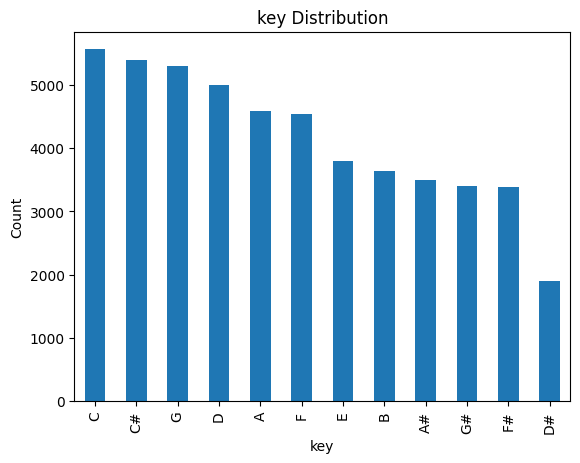

In [42]:
genre_counts = allData['key'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('key')
plt.ylabel('Count')
plt.title('key Distribution')
plt.show()

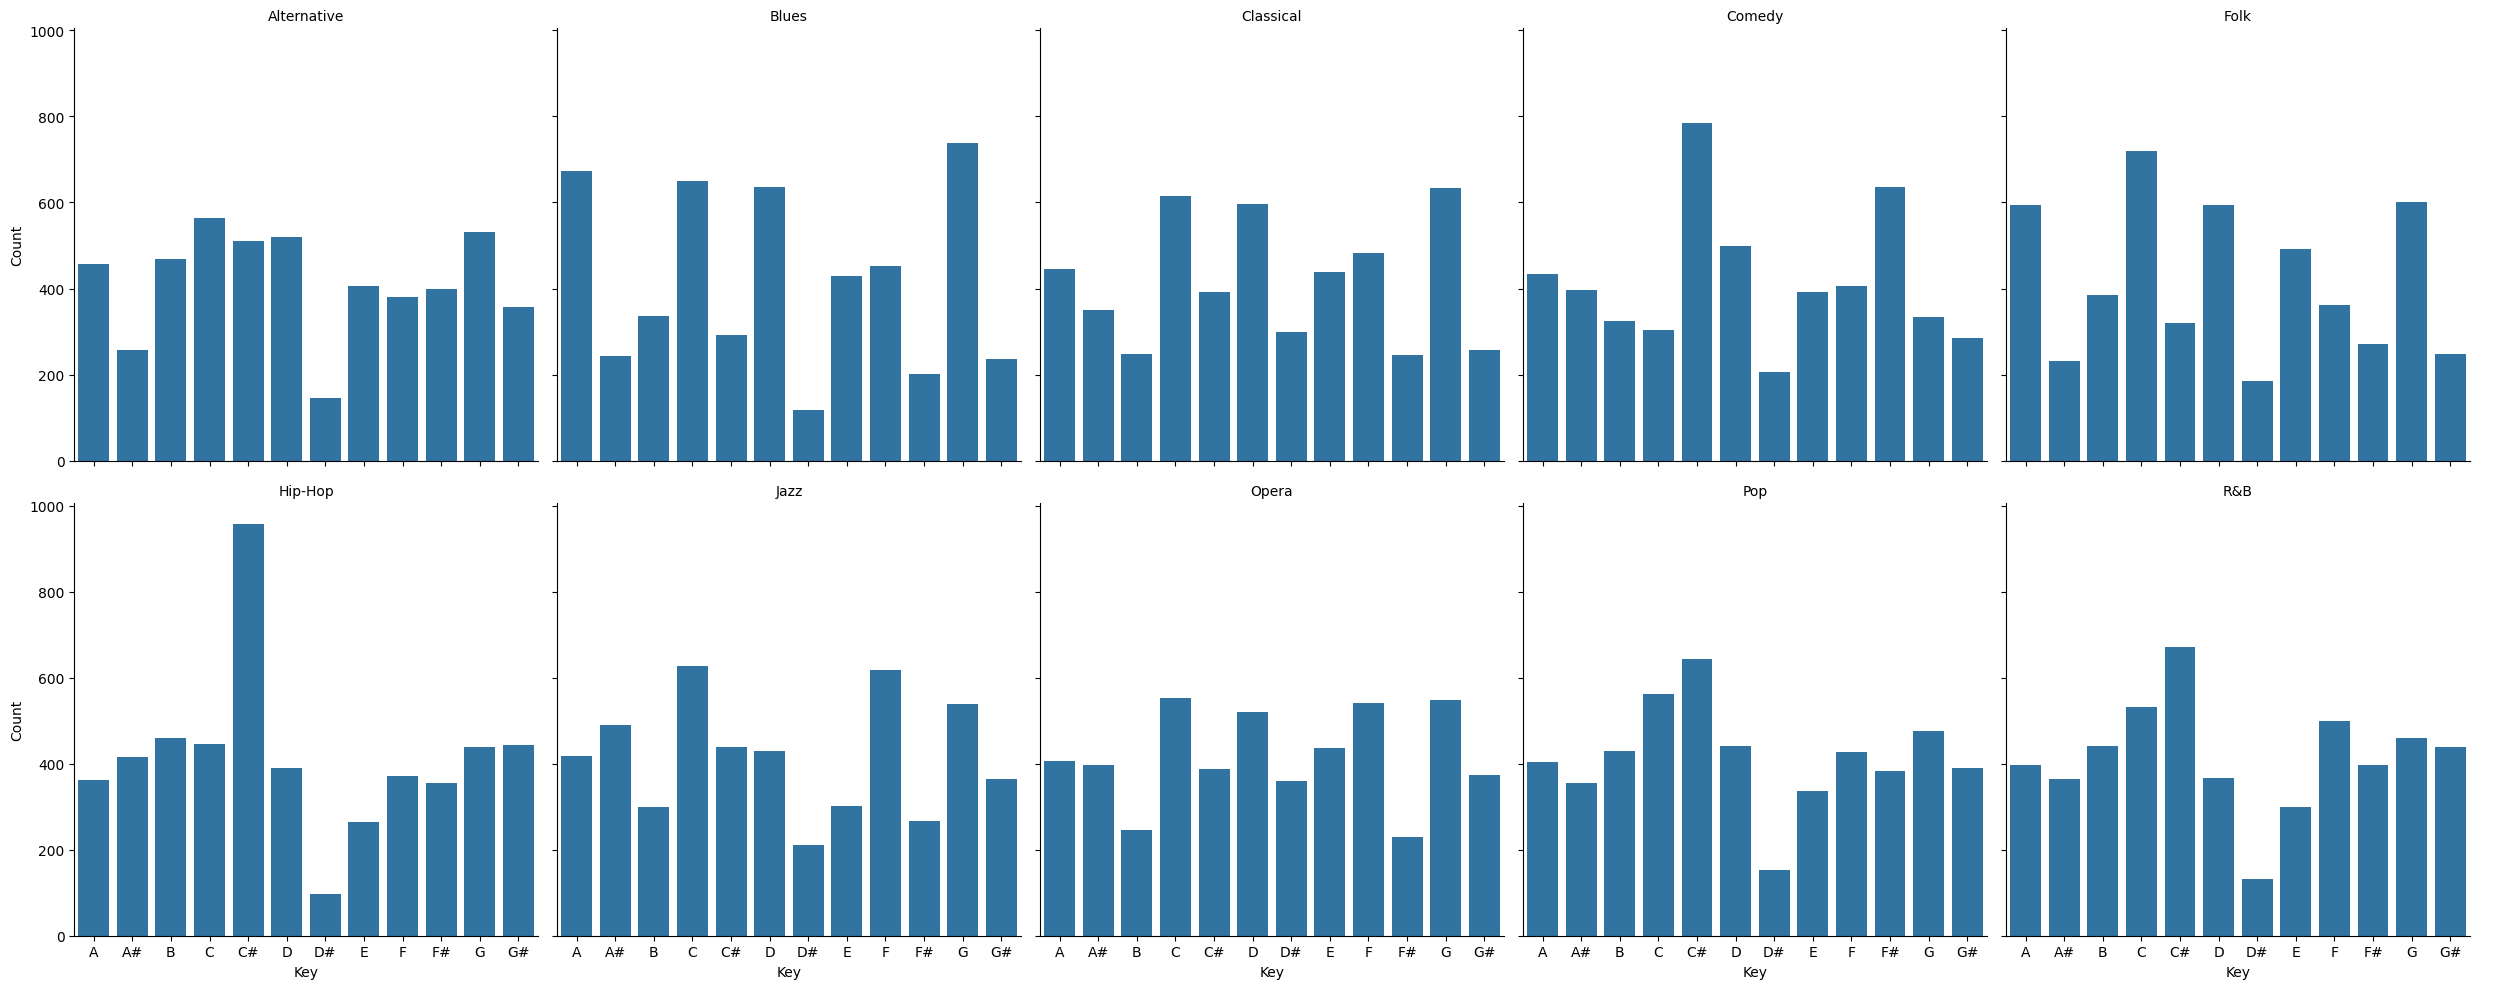

In [43]:
temp = allData.groupby(["genre", "key"]).count().instance_id
temp = temp.reset_index()
temp = temp.rename(columns={"instance_id": "count"})

g = sns.catplot(
    x="key",
    y="count",
    col="genre",
    data=temp,
    kind="bar",
    col_wrap=5,
    estimator=sum
)

g.set_axis_labels("Key", "Count")
g.set_titles("{col_name}")

plt.show()

In [44]:
allData.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.00000,D,0.0948,-7.845,Major,0.2360,130.99,04-Apr,0.663,Alternative
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.00000,F#,0.1560,-3.141,Minor,0.0581,197.817,04-Apr,0.286,Alternative
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.69200,C,0.0997,-6.568,Major,0.0800,?,04-Apr,0.514,Alternative
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.00153,C#,0.0368,-4.450,Major,0.0264,97.862,04-Apr,0.919,Alternative
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.00000,C#,0.0675,-4.251,Minor,0.0601,88.051,04-Apr,0.435,Alternative


### Finding 2:

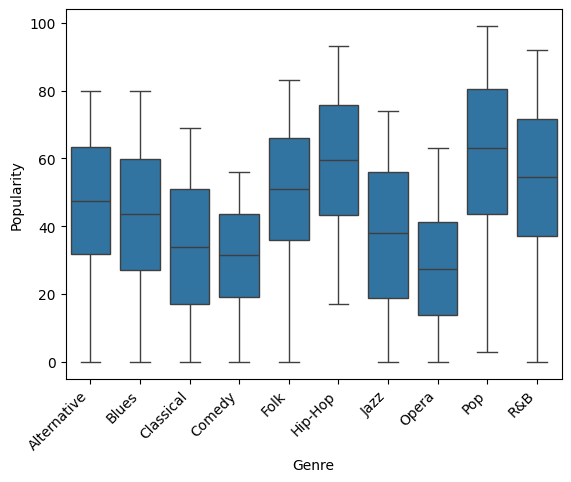

In [45]:
temp = allData.groupby(["genre", "popularity"]).count().instance_id
temp = temp.reset_index()
temp = temp.rename(columns={"instance_id": "count"})

g = sns.boxplot(
    x="genre",
    y="popularity",
    data=temp
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.show()

### Finding 3:

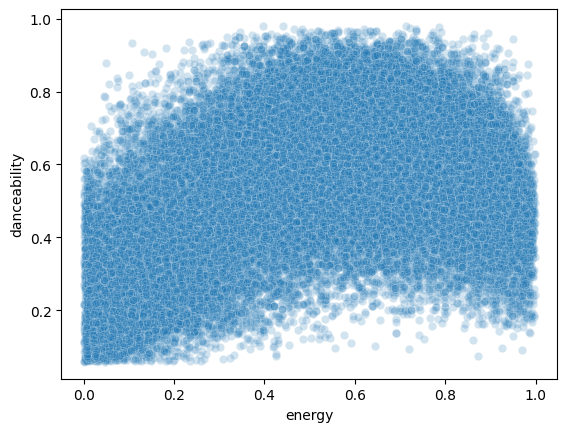

In [46]:
g = sns.scatterplot(
    x="energy",
    y="danceability",
    data=allData,
    alpha = 0.2
)
plt.xlabel("energy")
plt.ylabel("danceability")
plt.show()

### Finding 4:

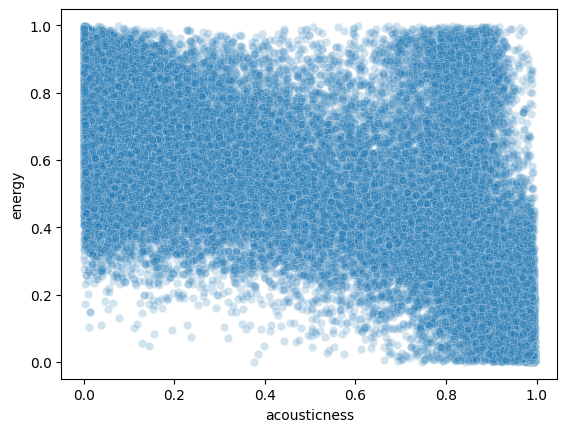

In [47]:
temp = allData.copy()
temp.duration_ms = temp.duration_ms/60000

g = sns.scatterplot(
    x="acousticness",
    y="energy",
    data=temp,
    alpha = 0.2
)
plt.xlabel("acousticness")
plt.ylabel("energy")
plt.show()

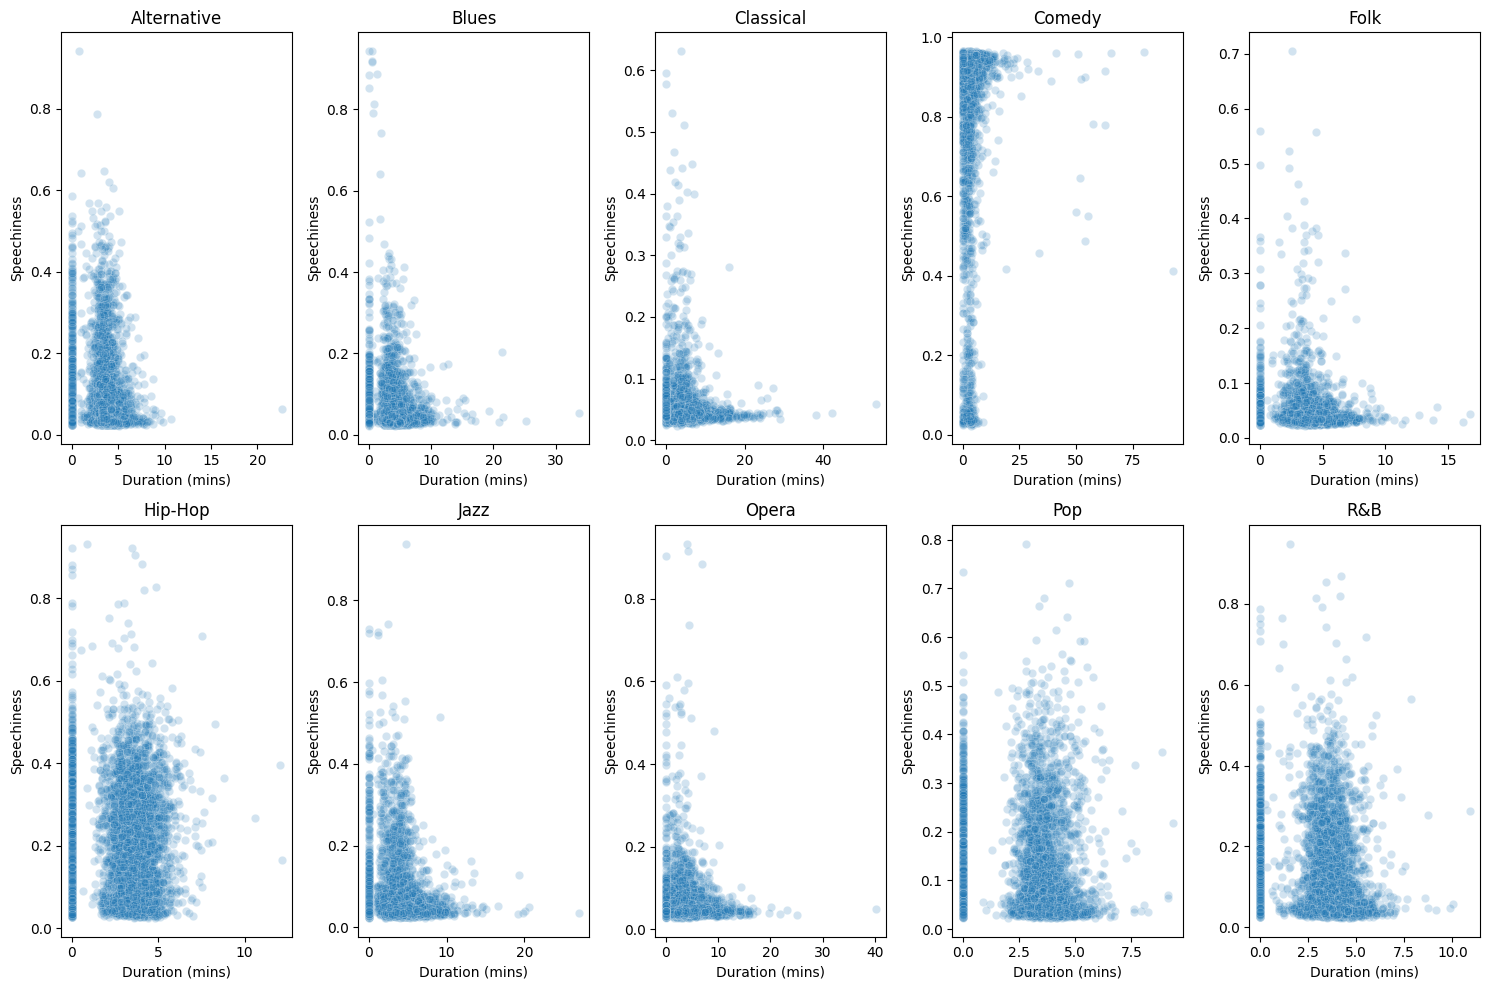

In [49]:
num_plots = len(data)
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, d in enumerate(data):
    temp = d.copy()
    temp.duration_ms = temp.duration_ms / 60000
    sns.scatterplot(
        x="duration_ms",
        y="speechiness",
        data=temp,
        alpha=0.2,
        ax=axes[i]  
    )
    axes[i].set_title(d["genre"][0])
    axes[i].set_xlabel("Duration (mins)")
    axes[i].set_ylabel("Speechiness")

# Remove any empty subplots if the number of plots is less than rows * cols
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## COMPLETION

In [20]:
allData

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.000000,D,0.0948,-7.845,Major,0.2360,130.99,04-Apr,0.663,Alternative
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.000000,F#,0.1560,-3.141,Minor,0.0581,197.817,04-Apr,0.286,Alternative
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.692000,C,0.0997,-6.568,Major,0.0800,?,04-Apr,0.514,Alternative
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.001530,C#,0.0368,-4.450,Major,0.0264,97.862,04-Apr,0.919,Alternative
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.000000,C#,0.0675,-4.251,Minor,0.0601,88.051,04-Apr,0.435,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,46447,Tobi Lou,"Lavender Town, Pt. 1 (feat. DJ Pharris)",4Z2BMWlk7adX79uG1Fi2Ak,43,0.09780,0.823,188108,0.619,0.000000,C#,0.0929,-9.820,Major,0.2110,147.985,04-Apr,0.163,R&B
4996,211174,Bruno Major,Easily,7B1GW9WZj5oTCCZ0X2SAbv,73,0.49100,0.772,-1,0.256,0.006120,G,0.1440,-8.545,Minor,0.0481,118.902,03-Apr,0.357,R&B
4997,105822,Marsha Ambrosius,Late Nights & Early Mornings,6Y1V1Lt0Zfrj2p4JW38boo,43,0.32400,0.638,207680,0.761,0.000000,G#,0.0624,-6.455,Major,0.3020,130.213,04-Apr,0.457,R&B
4998,56385,empty_field,TOMBOY,4cA6e3U7mtJfAOq3dWNAUZ,52,0.09610,0.300,241692,0.431,0.000012,D#,0.1140,-5.314,Major,0.0299,148.317,04-Apr,0.221,R&B


In [24]:
# separating genre form the rest
allData['tempo'] = allData['tempo'].replace("?", np.nan).astype(float)
allData['tempo'].fillna(allData['tempo'].mean(),inplace=True)

allData['duration_ms'].replace(-1, np.nan).astype(float)
allData['duration_ms'].fillna(allData['duration_ms'].mean(),inplace=True)

columns_to_remove = ["instance_id","artist_name", "track_name", "track_id"]
to_tranform = allData.drop(columns=columns_to_remove)
data_x = to_tranform.iloc[:,:-1]
data_y = to_tranform.iloc[:,-1]

# encoding genre
le = LabelEncoder()
genre_encoded = le.fit_transform(data_y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(data_x, genre_encoded, test_size=0.2, random_state=42)

# sorting by numeric and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# encoding categorical data
encoded_categorical_train = pd.get_dummies(X_train)
encoded_categorical_test = pd.get_dummies(X_test)

# normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encoded_categorical_train[numerical_features])
X_test_scaled = scaler.transform(encoded_categorical_test[numerical_features])
 
print(encoded_categorical_train)

C:\Users\ellio\AppData\Local\Temp\ipykernel_6268\3733458545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  allData['tempo'].fillna(allData['tempo'].mean(),inplace=True)
C:\Users\ellio\AppData\Local\Temp\ipykernel_6268\3733458545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

      popularity  acousticness  danceability  duration_ms  energy  \
4087          20      0.959000         0.290       153276  0.0781   
893           31      0.898000         0.650       211160  0.5070   
278           50      0.250000         0.680           -1  0.4710   
1398          37      0.795000         0.528       184560  0.9220   
3653          48      0.989000         0.138       236027  0.0211   
...          ...           ...           ...          ...     ...   
1284          43      0.955000         0.182           -1  0.2790   
4732          62      0.791000         0.229       207987  0.2390   
3158           5      0.965000         0.369       264533  0.3150   
860           49      0.000844         0.290       168750  0.6290   
795           22      0.847000         0.641       237787  0.6210   

      instrumentalness  liveness  loudness  speechiness      tempo  ...  \
4087          0.387000    0.1400   -15.967       0.0378  113.68117  ...   
893           0.02810

## Models

In [27]:
testing['tempo'] = testing['tempo'].replace("?", np.nan).astype(float)
testing['tempo'].fillna(testing['tempo'].mean(),inplace=True)

testing['duration_ms'].replace(-1, np.nan).astype(float)
testing['duration_ms'].fillna(testing['duration_ms'].mean(), inplace=True)

columns_to_remove = ["instance_id", "artist_name", "track_name", "track_id"]
testingSet = testing.drop(columns=columns_to_remove)

categorical_encoded = pd.get_dummies(testingSet)
testing_scaled = scaler.transform(testingSet[numerical_features])

rf = RandomForestClassifier(random_state=42, n_estimators=255, max_depth=25, max_samples=0.9, max_features=3, min_samples_split=35)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(testing_scaled)
class_names = le.inverse_transform(y_pred)

data = {
    'instance_id': testing.instance_id, 
    'genre': class_names 
}

result_df = pd.DataFrame(data)
print(result_df)

result_df.to_csv("rfc.csv", index=False)

C:\Users\ellio\AppData\Local\Temp\ipykernel_6268\4134182210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testing['tempo'].fillna(testing['tempo'].mean(),inplace=True)
C:\Users\ellio\AppData\Local\Temp\ipykernel_6268\4134182210.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

       instance_id    genre
0                1    Opera
1                2  Hip-Hop
2                3    Blues
3                4     Jazz
4                5     Jazz
...            ...      ...
12430        12431     Folk
12431        12432      Pop
12432        12433     Jazz
12433        12434      Pop
12434        12435     Folk

[12435 rows x 2 columns]


In [32]:
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6514
